In [1]:
import pandas as pd
import sys
sys.path.append('../../')
from modules.plots import tradeoff_performance_fairness

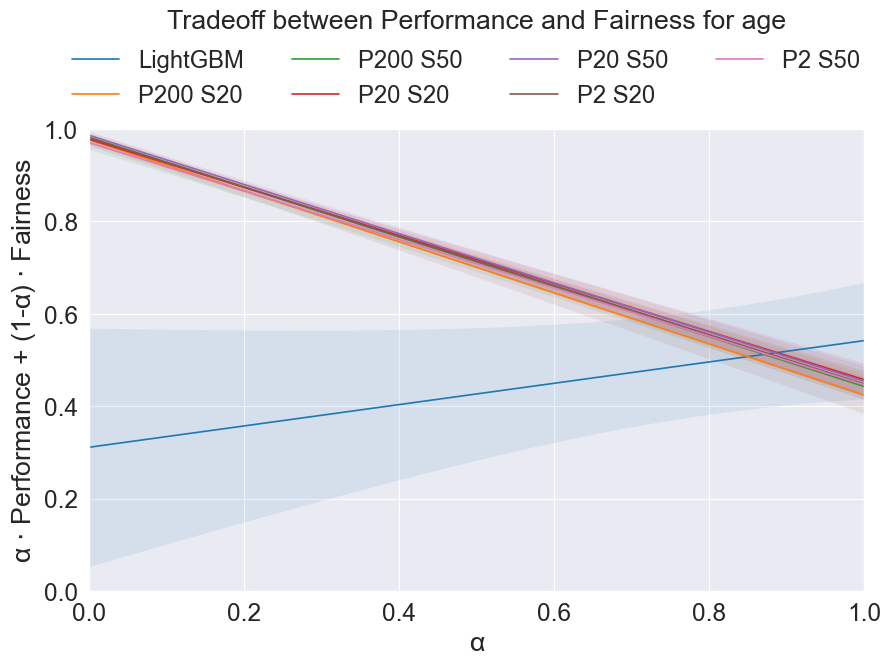

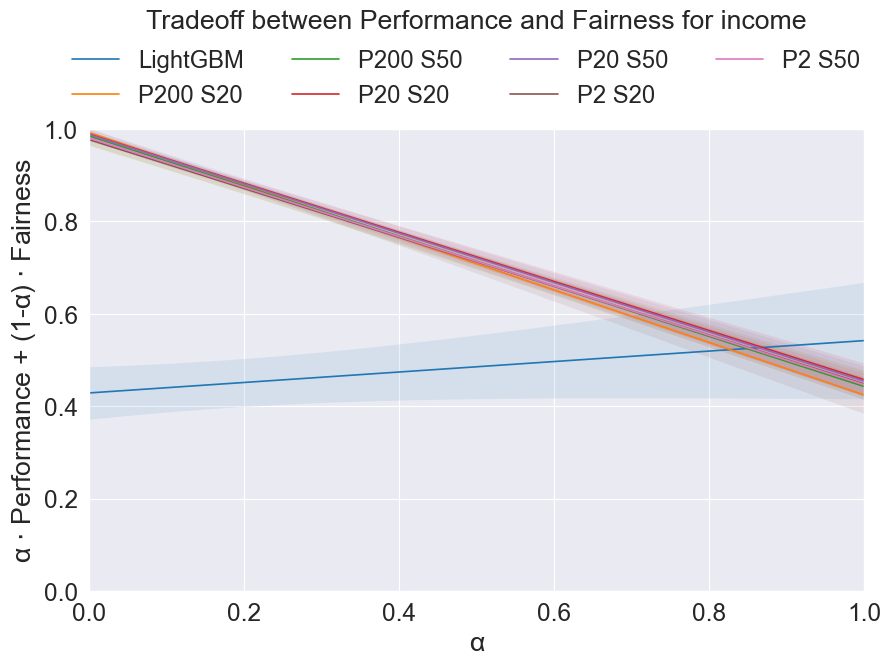

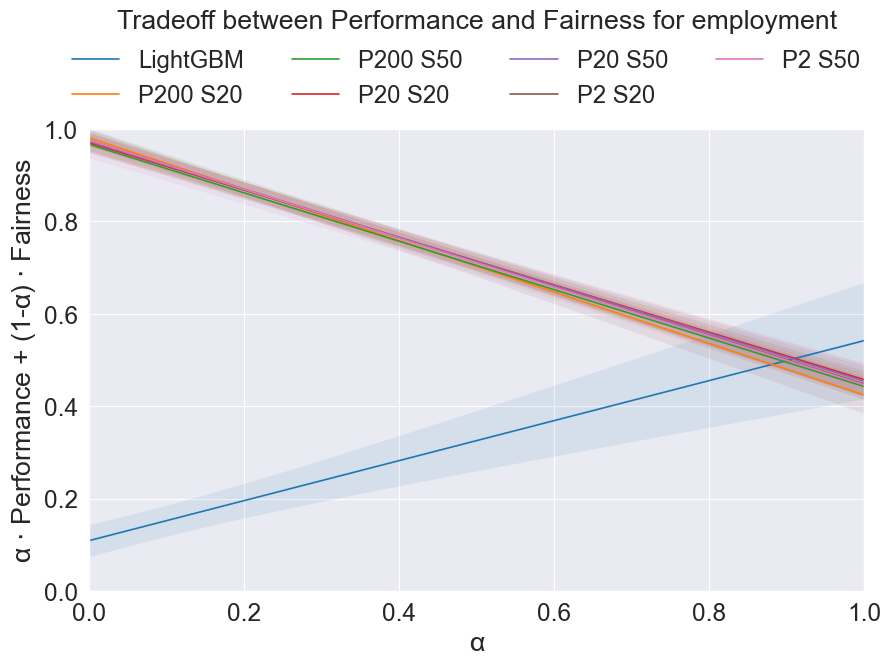

In [2]:
configs = [
    "P2_S20",
    "P20_S20",
    "P200_S20",
    "P2_S50",
    "P20_S50",
    "P200_S50",
    "LightGBM"
]
all_results = []
for config in configs:
    results_df = pd.read_csv(f'results/results-{config}.csv')
    all_results.append(results_df)
for i, results_df in enumerate(all_results):
    all_results[i] = results_df[results_df['recall@5FPR'] > 0].copy()
    all_results[i].loc[:, "model"] = configs[i]
results_df = pd.concat(all_results)
results_df = results_df[['model', 'dataset','recall@5FPR', 'fpr_ratio_age', 'fpr_ratio_income', 'fpr_ratio_employment']]
bests = results_df.groupby(['dataset', 'model']).apply(lambda x: x.nlargest(1, 'recall@5FPR')).reset_index(drop=True)
bests['model'] = bests['model'].str.replace('_', ' ')
for attr in ['age', 'income', 'employment']:
    tradeoff_performance_fairness(bests, 'recall@5FPR', f'fpr_ratio_{attr}', 
        title=f"Tradeoff between Performance and Fairness for {attr}",
        y_label='\u03B1 $\cdot$ Performance + (1-\u03B1) $\cdot$ Fairness', 
        text_scale=2,
        loc='top'
    )